# ARA system response plots

In [106]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
import pyrex.custom.ara as ara


In [4]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

## Filter

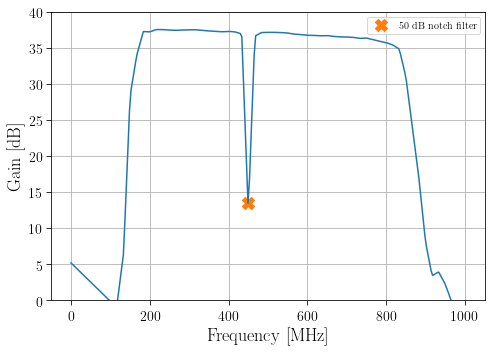

In [178]:
plt.figure(figsize=(7,5))
ara.antenna.ALL_FILTERS_DATA
plt.plot(ara.antenna.ALL_FILTERS_DATA[1]*1E-6,10*np.log10(abs(ara.antenna.ALL_FILTERS_DATA[0])))
plt.scatter(ara.antenna.ALL_FILTERS_DATA[1][115]*1E-6,10*np.log10(abs(ara.antenna.ALL_FILTERS_DATA[0][115])), marker ="X", s = 150, color = "C1", label = "50 dB notch filter")
# plt.yscale('log')
plt.grid()
plt.xlabel("Frequency [MHz]")
plt.ylabel("Gain [dB]")
plt.ylim(0, 4E1)
plt.legend()
plt.tight_layout()

plt.savefig("./ARA_filter.pdf")

In [133]:
wf = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes/wform_forDebug.pkl")
wf.head()

,time,voltage
0,-200.0000,-24.716146
1,-199.6875,-21.912004
2,-199.3750,10.532552
3,-199.0625,6.415132
4,-198.7500,-6.465106


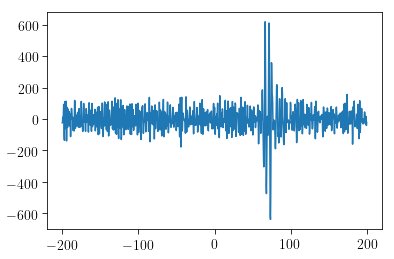

In [134]:
plt.plot(wf.time,wf.voltage)

In [135]:
fft_v, fft_f, dT = util.doFFT(wf.time,wf.voltage)

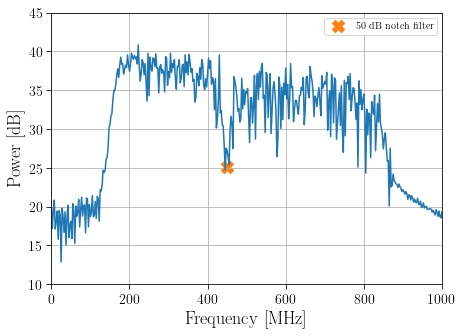

In [164]:
plt.figure(figsize=(7,5))

plt.plot(fft_f, 10*np.log10(abs(fft_v)))
plt.scatter(fft_f[180],10*np.log10(abs(fft_v[180])-200), marker ="X", s = 150, color = "C1", label = "50 dB notch filter")
# plt.yscale("log")
# plt.xlim(10,1000)
plt.ylim(10,45)
plt.xlim(0,1E3)
plt.ylabel("Power [dB]")
plt.xlabel("Frequency [MHz]")
plt.legend()
plt.grid()
# plt.savefig("./ARA_filter.pdf")

## Antennas

In [173]:
vpol = ara.VpolAntenna("VPol", (0, 0, -200), 0)
vpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

hpol = ara.HpolAntenna("HPol", (0, 0, -200), 0)
hpol.set_orientation(z_axis=(0, 0, 1), x_axis=(1, 0, 0))

In [165]:
ARASIM_VPOL_DATA_FILE = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_bicone6in_output.txt")
ARASIM_HPOL_DATA_FILE = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_dipoletest1_output.txt")
# Vpol data file contains only the theta responses
ARASIM_VPOL_THETA_RESPONSE_DATA = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_VPOL_DATA_FILE)
ARASIM_VPOL_RESPONSE_DATA = (
    ARASIM_VPOL_THETA_RESPONSE_DATA[0],
    np.zeros(ARASIM_VPOL_THETA_RESPONSE_DATA[0].shape),
    *ARASIM_VPOL_THETA_RESPONSE_DATA[1:]
)
# Hpol data file contains only the phi responses
ARASIM_HPOL_PHI_RESPONSE_DATA = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_HPOL_DATA_FILE)
ARASIM_HPOL_RESPONSE_DATA = (
    np.zeros(ARASIM_HPOL_PHI_RESPONSE_DATA[0].shape),
    *ARASIM_HPOL_PHI_RESPONSE_DATA
)

In [166]:
class AraSimHpol(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_HPOL_RESPONSE_DATA,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)
class AraSimVpol(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_VPOL_RESPONSE_DATA,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)

In [167]:
vpolARA = AraSimVpol("VPol", (0, 0, -200), 0)
hpolARA = AraSimHpol("HPol", (0, 0, -200), 0)


In [168]:
freq = np.array([200e6])
phi = np.radians(90)
# phis = np.linspace(0, 360, 91)
vpol_pol = (0, 0, 1)
hpol_pol = (0,1 , 0)
# vpol_resp = [vpolARA.antenna.directional_response(direction_theta, phi, vpol_pol)(freq)*vpolARA.antenna.frequency_response(freq) for phi in np.radians(phis)]
# hpol_resp = [hpolARA.antenna.directional_response(direction_theta, phi, hpol_pol)(freq)*hpolARA.antenna.frequency_response(freq) for phi in np.radians(phis)]

# plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
# plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# plt.plot(phis, np.abs(vpol_resp), label="%s MHz, %s"%(int(freq/1E6), vpol.name))
# plt.plot(phis, np.abs(hpol_resp), label="%s MHz, %s"%(int(freq/1E6), hpol.name))
# # plt.axvline(np.degrees(phi), c='r', ls='--', alpha=0.5)
# plt.xlim(0, 360)
# plt.legend(loc="upper right")
# plt.xlabel("Phi [deg]")
# plt.ylabel("Effective Height [m]")
# # plt.title(f"Antenna Response, $\\theta$={int(round(180-np.degrees(theta)))} deg")

In [169]:
ARASIM_VPOL_DATA_FILE_UP = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_bicone6in_output_updated2016.txt")
ARASIM_HPOL_DATA_FILE_UP = os.path.join(pyrex.custom.ara.antenna.ARA_DATA_DIR,
                                     "ARA_dipoletest1_output_updated2016.txt")
# Vpol data file contains only the theta responses
ARASIM_VPOL_THETA_RESPONSE_DATA_UP = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_VPOL_DATA_FILE_UP)
ARASIM_VPOL_RESPONSE_DATA_UP = (
    ARASIM_VPOL_THETA_RESPONSE_DATA_UP[0],
    np.zeros(ARASIM_VPOL_THETA_RESPONSE_DATA_UP[0].shape),
    *ARASIM_VPOL_THETA_RESPONSE_DATA_UP[1:]
)
# Hpol data file contains only the phi responses
ARASIM_HPOL_PHI_RESPONSE_DATA_UP = pyrex.custom.ara.antenna._read_arasim_antenna_pickle(ARASIM_HPOL_DATA_FILE_UP)
ARASIM_HPOL_RESPONSE_DATA_UP = (
    np.zeros(ARASIM_HPOL_PHI_RESPONSE_DATA_UP[0].shape),
    *ARASIM_HPOL_PHI_RESPONSE_DATA_UP
)

In [170]:
class AraSimHpol_UP(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_HPOL_RESPONSE_DATA_UP,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)
class AraSimVpol_UP(pyrex.custom.ara.antenna.ARAAntennaSystem):
    def __init__(self, name, position, power_threshold,
                 amplification=1, amplifier_clipping=1, noisy=True,
                 unique_noise_waveforms=10):
        super().__init__(response_data=ARASIM_VPOL_RESPONSE_DATA_UP,
                         name=name, position=position,
                         power_threshold=power_threshold,
                         orientation=(0,0,1),
                         amplification=amplification,
                         amplifier_clipping=amplifier_clipping,
                         noisy=noisy,
                         unique_noise_waveforms=unique_noise_waveforms)

In [171]:
vpolARA_UP = AraSimVpol_UP("VPol", (0, 0, -200), 0)
hpolARA_UP = AraSimHpol_UP("HPol", (0, 0, -200), 0)

In [174]:
freqs = np.linspace(0,1,100)
freq_resp = vpolARA.antenna.frequency_response(freqs*1E9)*vpolARA.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)
freq_resp_Ch = vpol.antenna.frequency_response(freqs*1E9)*vpol.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)
freq_resp_UP = vpolARA_UP.antenna.frequency_response(freqs*1E9)*vpolARA_UP.antenna.directional_response(np.pi/2, phi, vpol_pol)(freqs*1E9)

No handles with labels found to put in legend.


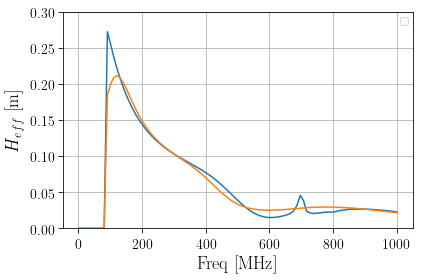

In [187]:
plt.figure(figsize=(7,5))

plt.plot(freqs*1000, abs(freq_resp), label = "")
# plt.plot(freqs*1000, abs(freq_resp_UP), "--",label = "")
plt.plot(freqs*1000, abs(freq_resp_Ch), label = "")
plt.ylim(0,0.3)
plt.ylabel("$H_{eff}$ [m]")
plt.xlabel("Freq [MHz]")
# plt.title("Vpol response")
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig("./plots/Antennas/Vpol_comparison.png", dpi=200)


In [180]:
freq_resp_H = hpolARA.antenna.frequency_response(freqs*1E9)*hpolARA.antenna.directional_response(np.pi/2, 0, hpol_pol)(freqs*1E9)
freq_resp_Ch_H = hpol.antenna.frequency_response(freqs*1E9)*hpol.antenna.directional_response(np.pi/2, 0, hpol_pol)(freqs*1E9)
freq_resp_UP = hpolARA_UP.antenna.frequency_response(freqs*1E9)*hpolARA_UP.antenna.directional_response(np.pi/2, 0, hpol_pol)(freqs*1E9)

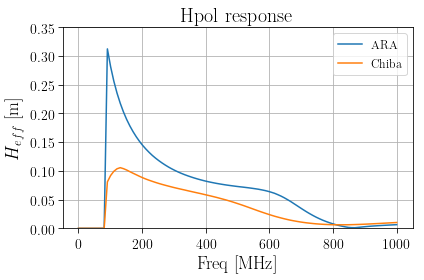

In [196]:
# plt.figure(figsize=(7,5))

plt.plot(freqs*1000, abs(freq_resp_H), label = "ARA")
# plt.plot(freqs*1000, abs(freq_resp_UP), "--",label = "")
plt.plot(freqs*1000, abs(freq_resp_Ch_H), label = "Chiba")
plt.ylim(0,0.35)
plt.ylabel("$H_{eff}$ [m]")
plt.xlabel("Freq [MHz]")
plt.title("Hpol response")
plt.legend(fontsize=12)
plt.grid()

plt.tight_layout()
# plt.savefig("./plots/Antennas/Hpol_comparison.png", dpi=200)
